In [2]:
using Random, Distributions, Statistics, Plots

In [3]:
function generate_utilities(n::Int, σ::Float64, μ::Float64=5.0)
    util_real = rand(Normal(μ, σ), n)
    sort_idx = sortperm(util_real)
    util_real_sorted = util_real[sort_idx]

    util_est = similar(util_real_sorted)
    if n >= 2
        util_est[1] = rand(Uniform(0, max(util_real_sorted[2],0.001)))
        for i in 2:(n-1)
            util_est[i] = rand(Uniform(min(util_est[i-1],util_real_sorted[i+1]-0.001), util_real_sorted[i+1]))
        end
        util_est[n] = rand(Uniform(min(util_est[n-1],util_real_sorted[n]-0.001), util_real_sorted[n]))
    else
        util_est[1] = util_real_sorted[1]
    end
    
    return util_real_sorted, util_est, sort_idx
end
generate_utilities(100,2.0,5.0)

([-0.826772240651712, 1.0989350295238398, 1.2866437363195677, 1.2980168046689502, 1.5247964767879774, 1.838268957613642, 2.244960881727097, 2.3322251800727396, 2.3346755926287037, 2.373596854551678  …  7.6324323008325194, 7.826703074895049, 8.31192962602083, 8.401561765272119, 8.448840370665922, 8.808694192030014, 8.956032242456203, 9.32436815486722, 9.351235440367661, 10.219601660739848], [0.07811240808114041, 0.7196007448737506, 0.9970674013161486, 1.240359395571579, 1.4336062033228458, 1.6783845789205925, 2.0262772776065368, 2.101333514174437, 2.3259936694787497, 2.327501620429852  …  7.726060005725806, 7.888158692459214, 8.208561255491208, 8.21450898013226, 8.738580993937966, 8.847602155953947, 8.96150787658583, 8.964757104038961, 8.995437697013244, 9.9474335898179], [71, 5, 48, 7, 84, 58, 92, 6, 19, 98  …  57, 62, 34, 51, 65, 4, 81, 25, 97, 16])

In [4]:
function I(vec::Vector{Float64})::Vector{Float64}
    max_val = maximum(vec)
    return [v == max_val ? 1.0 : 0.0 for v in vec]
end

I (generic function with 1 method)

In [146]:
function simulate_game(util_real::Vector{Float64}, util_est::Vector{Float64}, order::Vector{Int}, n_odc::Int, pen::Int=0)
    n = length(util_real)
    ile = 0.0
    if n_odc == n
        return 0,100
    end
    screening_indices = order[1:n_odc]
    M, idx_max = findmax(util_real[screening_indices])

    for i in (n_odc+1):n
        cand_idx = order[i]
        if util_real[cand_idx] > M
            ile+=i
            return util_real[cand_idx], ile
        end
    end
    ile+=n
    return util_real[order[n]], ile
end
util_real,util_est,sort_idx = generate_utilities(100,2.0,5.0)
println(util_real)
simulate_game(util_real,util_est,randperm(100),14)

[-0.6803792277278848, 0.32505237806281784, 1.153118697791966, 1.175114756100685, 1.3948265162565865, 1.5078335860273446, 1.6625450364989023, 1.7839081756213386, 1.8240901648326098, 1.9734605126333316, 2.153702052188688, 2.5155812878670467, 2.619724311968475, 2.6819705735587904, 2.773934403827772, 2.819091828028625, 2.8869724281088613, 2.9205027363423346, 3.031111251066569, 3.0845367464464877, 3.1286195476311094, 3.248418080469502, 3.292960464809716, 3.3305119834387114, 3.414275465628484, 3.510564986435751, 3.5707924618600515, 3.587912149012371, 3.641769335699715, 3.6623848426571515, 3.700237061331663, 3.76769089714164, 3.7752697414873, 3.784722078997366, 3.8815929302920873, 4.015943213355835, 4.050163261069229, 4.05698284214079, 4.156025992312273, 4.194157563047005, 4.279013697236516, 4.298882097601181, 4.405816236233986, 4.416126184490288, 4.424359244467988, 4.50380411513198, 4.747147713748317, 4.80987574601777, 4.837690434322049, 4.845906412739167, 4.911236619108694, 4.99178095517164

(8.62631298135813, 43.0)

In [150]:
function simulate_secretary(n::Int, t::Int, σ::Float64)
    scores = zeros(n)
    ile = zeros(n)

    for sim in 1:t
        util_real, util_est, sort_idx = generate_utilities(n, σ)
        order = randperm(n)
        for n_odc in 1:n
            score = simulate_game(util_real, util_est, order, n_odc)
            scores[n_odc] += score[1]
            ile[n_odc] += score[2]
        end
    end
    avg_scores = scores ./ t
    ile_srednio = ile ./t
    return avg_scores, ile_srednio
end
simulate_secretary(100, 10000, 2.0)

([6.7629023300894175, 7.384185324794655, 7.726172201118631, 7.945185862992418, 8.105657587316069, 8.209862550138356, 8.2978800821651, 8.365365764516902, 8.415983527679025, 8.449375171669761  …  5.39293234553523, 5.345498366981526, 5.304930549352894, 5.258946735969828, 5.204291319518448, 5.157761949190307, 5.102875664418264, 5.045107040721888, 4.993735724868065, 0.0], [6.1773, 10.1878, 13.8849, 17.0382, 19.941, 22.9023, 25.6228, 28.0606, 30.6064, 33.0446  …  99.6383, 99.714, 99.7777, 99.8347, 99.8939, 99.9334, 99.9666, 99.9895, 100.0, 100.0])

In [157]:
n = 100
t = 10000
σ = 2.0

avg_scores = simulate_secretary(n, t, σ)[1]

best_cutoff = argmax(avg_scores)

println("Najlepszy cutoff: ", best_cutoff)
println("Średni score dla cutoffu ", best_cutoff, ": ", avg_scores[best_cutoff])
println(simulate_secretary(n, t, σ)[2][best_cutoff])


Najlepszy cutoff: 14
Średni score dla cutoffu 14: 8.461474105268179
42.0246


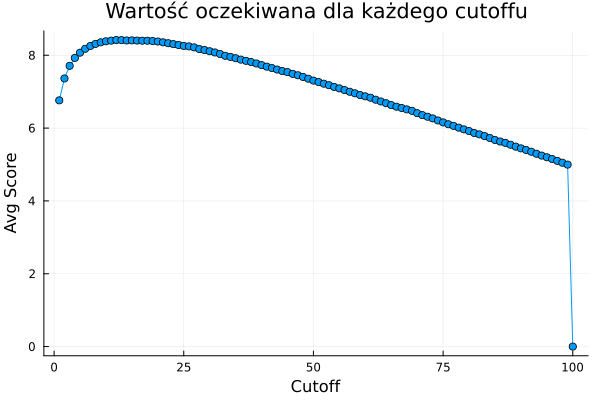

In [55]:
plot(1:100, avg_scores, marker=:circle, xlabel="Cutoff", ylabel="Avg Score", title="Wartość oczekiwana dla każdego cutoffu", legend=false)